<a href="https://colab.research.google.com/github/prakhar281005/Python-Projects/blob/main/k_means_clustering_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-Means clustering algorithm


## Trial implementation

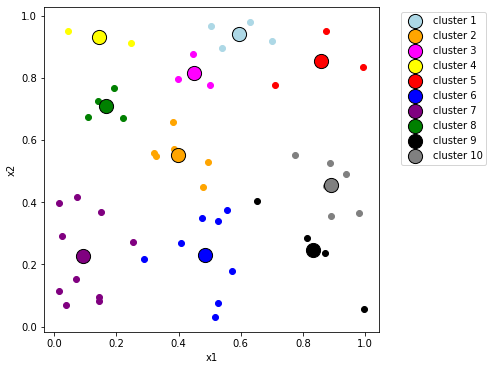

In [3]:
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt 

# Randomly initializing the cluster centers 
m = 50
d = 2
k = 10

X = np.random.random((m,d))
cluster_centers = np.random.random((k,d))
cluster_ind = np.zeros(m)

# Repeating for `max_iter` iterations:
max_iter = 500
for i in range(max_iter):

  for j in range(m):
    distances = np.zeros(k)
    
    for l in range(k):
      dist = np.linalg.norm(X[j,:] - cluster_centers[l,:] )
      distances[l] = dist

# Assigning training examples to the nearest cluster center

    distance_idxs = np.argsort(distances)
    closest_idx = distance_idxs[0]

    cluster_ind[j] = closest_idx


# Updating the cluster centers by computing the mean of the cluster's assigned training examples

  for l in range(k):
    Xl = X[cluster_ind == l,:]
    new_center = np.mean(Xl, axis = 0)
    cluster_centers[l,:] = new_center

# generating and fitting the model to the dataset using k clusters 
#print(cluster_ind)

fig = plt.figure(figsize=(6,6))

ax = fig.gca()
ax.set_aspect('equal')

colors = ["lightblue", "orange", "magenta","yellow","red","blue","purple","green", "black","grey"]

for i in range(k):

  # plotting  data in cluster i
  plt.scatter(X[cluster_ind == i, 0], X[cluster_ind == i, 1], 
              marker='o', color=colors[i])
  
  # plotting cluster center i
  plt.scatter(cluster_centers[i, 0], cluster_centers[i, 1], 
              marker='o', color=colors[i], edgecolors="black", s=200, 
              #label=(f"cluster {i+1}")
              label=("cluster %d" %(i+1)) )

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')



# Image compression using k-means clustering



In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()
im = Image.open(BytesIO(uploaded['peppers.tiff']))

Saving peppers.tiff to peppers.tiff


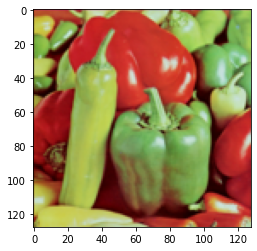

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(im)

In [ ]:
arr = np.array(im)
arr.shape

(128, 128, 3)

In [ ]:
r_values = arr[:, :, 0].flatten()
g_values = arr[:, :, 1].flatten()
b_values = arr[:, :, 2].flatten()

(0.0, 255.0)

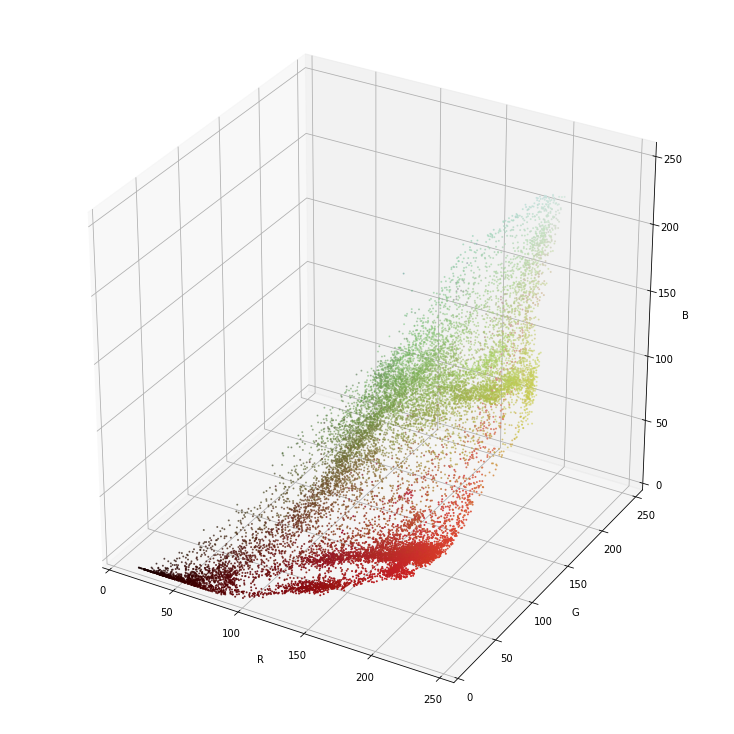

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# making a vector of colors to use in the scatterplot
colors = [(r_values[i]/255, g_values[i]/255, b_values[i]/255) for i in range(len(r_values))]


fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

# plotting the pixels as points in the RGB space
ax.scatter(r_values, g_values, b_values, c=colors, s=1)
ax.set_xlabel("R")
ax.set_ylabel("G")
ax.set_zlabel("B")
ax.set_xlim((0,255))
ax.set_ylim((0,255))
ax.set_zlim((0,255))

In [ ]:
X = np.append(r_values.reshape(-1,1), g_values.reshape(-1,1), axis=1)
X = np.append(X,                      b_values.reshape(-1,1), axis=1)

X.shape

(16384, 3)

(0.0, 255.0)

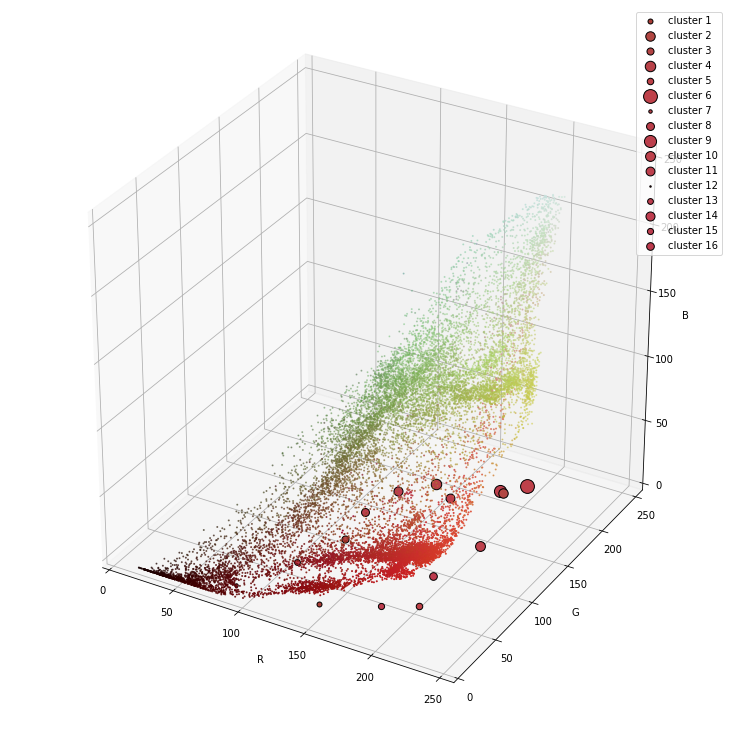

In [ ]:
# performing clustering on the dataset and printing out the cluster centers

from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

model = KMeans(n_clusters=16).fit(X)

# making a vector of colors to use in the scatterplot
colors = [(r_values[i]/255, g_values[i]/255, b_values[i]/255) for i in range(len(r_values))]


fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(r_values, g_values, b_values, c=colors, s=1)
for i in range(16):
  plt.scatter(model.cluster_centers_[i, 0,0], model.cluster_centers_[i, 10], model.cluster_centers_[i,2,0] ,
              marker='o', color=colors[i], edgecolors="black", 
              label=("cluster %d" %(i+1)) )
plt.legend()
  
# plotting the pixels as points in the RGB space

ax.set_xlabel("R")
ax.set_ylabel("G")
ax.set_zlabel("B")
ax.set_xlim((0,255))
ax.set_ylim((0,255))
ax.set_zlim((0,255))


(0.0, 255.0)

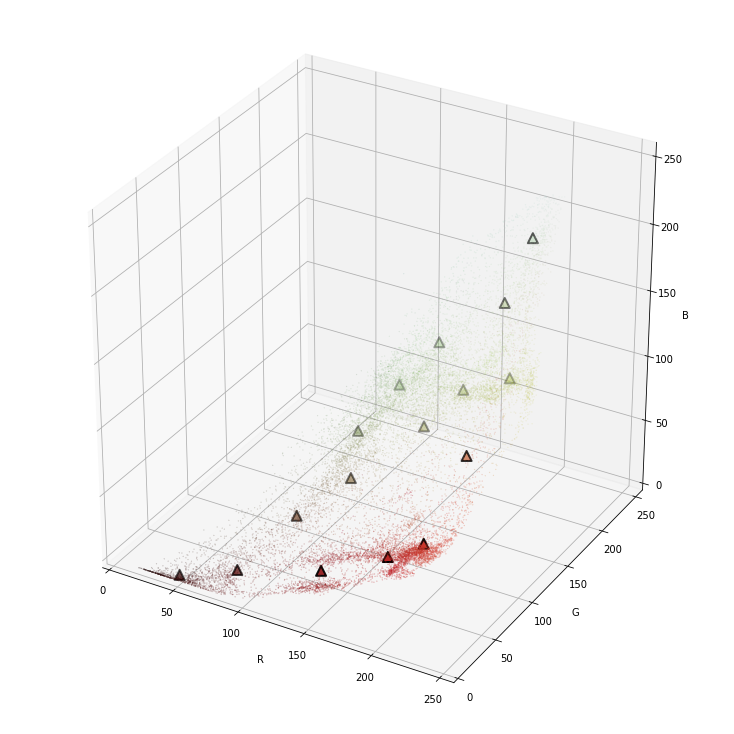

In [ ]:
# getting RGB values of cluster centers
def get_rgb_from_cluster_centers(ccs):

    return ccs[:,0], ccs[:,1], ccs[:,2]

# getting RGB tuples to use for colors in the scatterplot
def get_colors_from_cluster_centers(ccs):

    return [(ccs[i,0]/255, ccs[i,1]/255, ccs[i,2]/255) for i in range(ccs.shape[0])]


# getting cluster RGB values and plotting colors
cluster_r_values, cluster_g_values, cluster_b_values = get_rgb_from_cluster_centers(model.cluster_centers_)
cluster_colors                                       = get_colors_from_cluster_centers(model.cluster_centers_)


fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

# plottig the pixels as points in the RGB space 
ax.scatter(r_values, g_values, b_values, c=colors, s=0.02)

# plotting the clusters as points in the RGB space
ax.scatter(cluster_r_values, cluster_g_values, cluster_b_values, c=cluster_colors, s=100, 
           marker="^", edgecolor='k', linewidths=2)
ax.set_xlabel("R")
ax.set_ylabel("G")
ax.set_zlabel("B")
ax.set_xlim((0,255))
ax.set_ylim((0,255))
ax.set_zlim((0,255))